**Introducción al Deep Learning**

*Definir un modelo lineal simple*

En primer lugar, tenemos que importar las librerías necesarias para poder crear nuestro modelo.

Vamos a trabajar con la librería de Temsorflow. Para instalar la librería ejecutamos el siguiente comando: pip install tensorflow

Documentación de Tensorflow: https://www.tensorflow.org/?hl=es

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

*Configuración del modelo*

Para configurar el modelo, debemos entender primero dos parámetros que hay que pasarle. El primer parámetro es *units*, este parámetro le indicará a los modelos qué cantidad de datos tiene que devolver como respuesta. El segundo parámetro es *input_shape*, en este parámetro le indicamos al modelo la cantidad de datos que va a recibir para tener que hacer la predicción o el entrenamiento.

Ej: Si queremos que nos devuelva la cantidad de calorías que tiene una tarta, al modelo le tendríamos que pasar los ingredientes de la tarta y él nos devolvería las calorías.
units = calorías y input_shape = ingredientes

Imaginando que los ingredientes son 3: harina, huevos y azúcar, el input_shape = [3] y cómo nos devuelve solo un valor que sería las calorías, units = 1

En el siguiente código se muestra cómo configuramos un modelo lineal simple.

In [3]:
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

El código completo quedaría de la siguiente forma:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

**Layers**

Ahora que ya sabemos configurar un modelo simple, vamos a profundizar en el uso de las capas (layers). Las capas nos permite hacer un modelo más complejo, cuanto más capas, más neuronas, y cuanto más neuronas, más procesamiento. Para entender un poco las capas de un modelo, imaginamos las capas de una cebolla, cuanto más capas quites de la cebolla, más cerca del centro estas.

Como en una cebolla, las capas de un modelo son parecidas. En una cebolla tenemos la capa superior y las capas ocultas dentro de la capa superior. Un modelo funciona igual, tiene su capa densa por donde introducimos los datos y tambien puede tener capas ocultas que permite añadir más neuronas al modelo y hacerlo más complejo.

El modelo secuencial que hemos estado utilizando conectará una lista de capas en orden de la primera a la última: la primera capa recibe la entrada, la última capa produce la salida. Es por eso que en la primera capa le pasamos el *input_shape* que como ya sabemos indica la cantidad de datos que vas a pasar al modelo. Tambnien a las capas ocultas les pasaremos un nuevo parametro llamado *activation* al que como valor le pasaremos *relu*.

Resulta que dos capas densas sin nada entre ellas no son mejores que una sola capa densa por sí sola. Las capas densas por sí solas nunca podrán sacarnos del mundo de las líneas y los planos. Lo que necesitamos es algo no lineal. Lo que necesitamos son funciones de activación. Por eso usamos la función *relu* para eso.

*Construcción de modelos secuenciales*

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # Capas ocultas (Hidden Layers)
    layers.Dense(units=4, activation="relu", input_shape=[3]),
    layers.Dense(units=3, activation="relu"),
    # Capa lineal
    layers.Dense(units=1)
])

Hay toda una familia de variantes de la activación 'relu' -- 'elu', 'selu', y 'swish', entre otras -- todas las cuales puedes usar en Keras. A veces una activación funcionará mejor que otra en una tarea determinada, por lo que podrías considerar experimentar con activaciones a medida que desarrollas un modelo. La activación ReLU tiende a funcionar bien en la mayoría de los problemas, por lo que es una buena para empezar.

**Entrenamiento de un modelo**

LLegamos a la parte más interesante, a la de entrenar un modelo con datos. Hasta ahora habíamos creado el modelo, pero no estaba entrenado con nada. Para entrenar un modelo, necesitamos lo más importante que son los datos. Imagina que quieres saber las calorías de una tarta, para eso necesitamos muchos datos de diferentes tartas con sus ingredientes y las calorías.

EJ: Tenemos un dataframe con los datos de 100 tartas que tienen sus ingredientes: Azúcar, harina, huevos, calorias.

Como nos interesa que el modelo aprenda a calcular las calorías vamos a tener que dividir los datos en [Azucar, harina, huevos] y [calorías]. De esta manera, le indicamos al modelo los datos con los que tiene que aprender ([Azucar, harina, huevos]) y el resultado que tiene que devolver ([calorías])

Además de los datos de entrenamiento, necesitamos dos cosas más:

* Una "loss function" (función de pérdida) que mide la calidad de las predicciones de la red.
* Un "optimizer" (optimizador) que puede indicar a la red cómo cambiar sus pesos.

*Loss Function*

Hemos visto cómo diseñar un modelo, pero no hemos visto cómo decirle al modelo qué problema debe resolver. Este es el trabajo de la función de pérdida.

La función de pérdida mide la disparidad entre el valor real del objetivo y el valor que predice el modelo.

Cada problema requiere una función de pérdida distinta. Por ejemplo, en los que la tarea consiste en predecir algún valor numérico: calorías en 80 cereales, puntuación en la calidad del vino tinto. Otras tareas de regresión pueden consistir en predecir el precio de una casa o la eficiencia del combustible de un coche.

Una función de pérdida común para los problemas de regresión es el error medio absoluto o MAE. MAE mide la disparidad respecto al dato verdadero respecto al que precide el modelo.

Además de MAE, otras funciones de pérdida que puedes ver para problemas de regresión son el error cuadrático medio (MSE) o la pérdida de Huber (ambas disponibles en Keras).

Durante el entrenamiento, el modelo utilizará la función de pérdida como guía para encontrar los valores correctos de sus pesos (una pérdida menor es mejor). En otras palabras, la función de pérdida indica a la red su objetivo.

*Optimizer*

Hemos descrito el problema que queremos que resuelva el modelo, pero ahora tenemos que decir cómo resolverlo. Este es el trabajo del optimizador. El optimizador es un algoritmo que ajusta los pesos para minimizar la pérdida.

Los pesos de un modelo son los valores que usa para predecir el resultado.

*Añadir la pérdida y el optimizador*

Después de definir un modelo, puede añadir una función de pérdida y un optimizador con el método de compilación del modelo:

In [ ]:
model.compile(
    optimizer="adam",
    loss="mae"
)

El optimizador adam permite ajustar de forma automática los pesos del modelo, así que usaremos ese.

El código completo quedaria así:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=20, activation="relu", input_shape=[3]),
    layers.Dense(units=20, activation="relu"),
    layers.Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="mae"
)

*Preparación de los datos para el entrenamiento*

Se va a entrenar un modelo que permite calificar la calidad de vinos. Para empezar, se crea un dataframe con pandas leyendo el contenido del csv donde tenemos los datos para entrenar el modelo. Para leer el csv y crear el dataframe, usaremos la función read_csv de pandas.

In [1]:
import pandas as pd

df = pd.read_csv("Modelos/red-wine.csv")

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Ahora que tenemos los datos en un dataframe, vamos a dividirlos en dos partes, los datos de entrenamiento y los datos de validación.

Los datos de entrenamiento nos sirven para entrenar el modelo, y los datos de validación nos permite probar el modelo y ver si se ha entrenado correctamente. Para los datos de entrenamiento, vamos a usar el 70% de los datos y para los de validación los datos restantes.

In [2]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

Una vez tenemos los datos separados en datos de entrenamiento y datos de validación, nos queda normalizar los datos para que el modelo se pueda entrenar de forma más eficiente.

In [3]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

Hay ya funciones que normalizan los datos, pero está bien aprender cómo hacerlo por nuestra cuenta.

Por último en la preparación de los datos, vamos a dividir los datos de la siguiente forma, en (X, Y) donde X contendrá los datos que se tienen que pasar al modelo para que los procese y nos dé la calidad del vino y en Y los resultados de la calidad de los vinos de nuestra muestra de datos.

In [4]:
x_train = df_train.drop("quality", axis=1)
x_valid = df_valid.drop("quality", axis=1)
y_train = df_train["quality"]
y_valid = df_valid["quality"]

Ahora nos queda crear el modelo para entrenar con los datos. Para el input_shape, podemos averiguarlo observando el número de columnas de la matriz de datos de la siguiente manera...

In [5]:
print(x_train.shape)

(1119, 11)


Usaremos el segundo valor para el input_shape.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=512, activation="relu", input_shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="mae"
)

Ya estamos listos para empezar el entrenamiento. Con el siguiente código de entrenamiento, le hemos dicho a Keras que alimente al optimizador con 256 filas de datos de entrenamiento cada vez (batch_size) y que lo haga 10 veces a lo largo del conjunto de datos (epochs).

Almacenaremos los datos del entrenamiento en una variable llamada *history* para después ver el resultado del entrenamiento.

In [8]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.3065 - val_loss: 0.1434
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1481 - val_loss: 0.1257
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1331 - val_loss: 0.1175
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1185 - val_loss: 0.1097
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1168 - val_loss: 0.1089
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1134 - val_loss: 0.1045
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1110 - val_loss: 0.1099
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1125 - val_loss: 0.1024
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1091 - val_loss: 0.1040
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1017 - val_loss: 0.0999


Una vez terminado el entrenamiento, crearemos una dataframe donde almacenamos el histórico del entrenamiento y los mostramos en un gráfico la pérdida para ver cómo fue el entrenamiento. Un entrenamiento válido es si la pérdida es cada vez menor.

<Axes: >

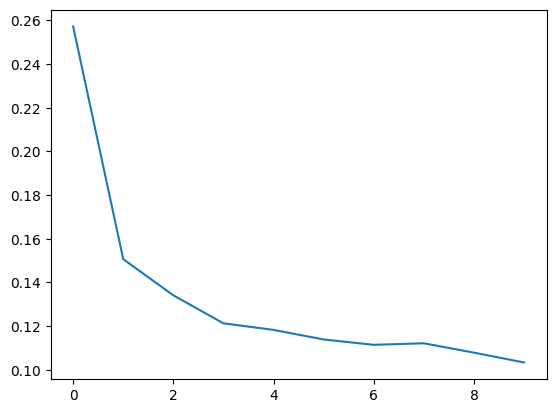

In [9]:
df_history = pd.DataFrame(history.history)
df_history["loss"].plot()

Todo el código de este ejercicio se vería de la siguiente forma, todo junto.

c:\Users\jairo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3062 - val_loss: 0.1469
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1486 - val_loss: 0.1263
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1327 - val_loss: 0.1179
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1155 - val_loss: 0.1104
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1106 - val_loss: 0.1102
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1089 - val_loss: 0.1035
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1039 - val_loss: 0.1013
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1015 - val_loss: 0.1030
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1011 - val_loss: 0.1030
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0998 - val_loss: 0.1004


<Axes: >

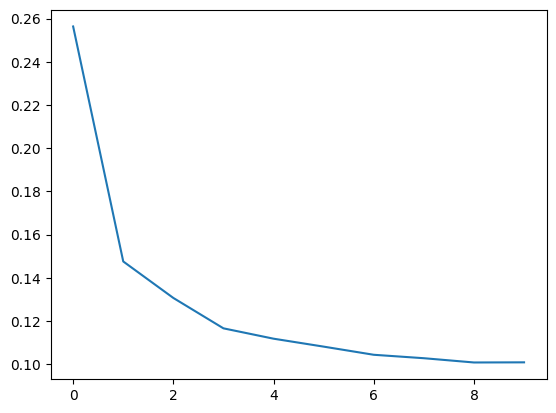

In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

# PREPARACIÓN DE LOS DATOS:
df = pd.read_csv("Modelos/red-wine.csv")

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

x_train = df_train.drop("quality", axis=1)
x_valid = df_valid.drop("quality", axis=1)
y_train = df_train["quality"]
y_valid = df_valid["quality"]

# CREACIÓN DEL MODELO Y ENTRENAMIENTO:
model = keras.Sequential([
    layers.Dense(units=512, activation="relu", input_shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="mae"
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=10
)

# RESULTADOS DEL ENTRENAMIENTO:
df_history = pd.DataFrame(history.history)
df_history["loss"].plot()

**Verificación de la calidad del modelo**

Al verificar en el gráfico, el loss que ha tenido un modelo en su entrenamiento no implica que al ser bajo el modelo esté realmente bien entrenado. Para eso, tenemos que también ver los de la validación y compararlos para ver si son similares y bajos (buen entrenamiento) o si, de lo contrario, la línea de validación se separa mucho del entrenamiento (mal entrenamiento).



<Axes: >

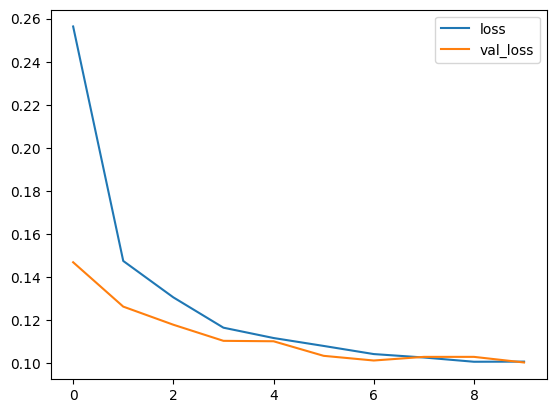

In [4]:
df_history.loc[:, ['loss', 'val_loss']].plot()

En este ejemplo vemos que ha tenido un buen entrenamiento.

**Early Stopping**

El *early stopping* nos ayuda a evitar que el modelo se sobre entrene con mucho ruido. En resumen, lo que hace es detener el entrenamiento del modelo cuando detecta que los modelos no consigue ya aprender, y así evita que empiece a aprender del ruido de los datos.

*Añadiendo Early Stopping*

Lo primero que haremos será importar la función *EarlyStopping* que se encuentra en *tensorflow.keras.callbacks*, una vez importada podremos hacer la configuración de la siguiente manera:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # cantidad mínima de cambio para contar como mejora
    patience=20, # cuántas épocas esperar antes de parar
    restore_best_weights=True
)

Estos parámetros dicen: "Si no ha habido al menos una mejora de 0.001 en la pérdida de validación sobre las 20 épocas anteriores, entonces detenga el entrenamiento y mantenga el mejor modelo que encontró". A veces puede ser difícil saber si la pérdida de validación está aumentando debido al sobreajuste o simplemente debido a la variación aleatoria del lote. Los parámetros nos permiten establecer algunos límites sobre cuándo parar.

Como veremos en nuestro ejemplo, pasaremos esta llamada de retorno al método de ajuste junto con la pérdida y el optimizador. Quedando el código completo de la siguiente forma:

c:\Users\jairo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pérdida mínima de validación: 0.09007728099822998


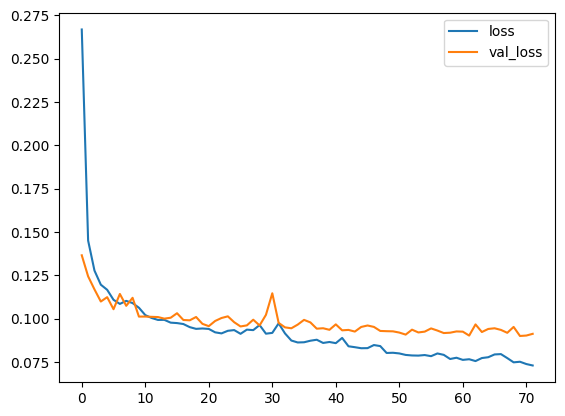

In [5]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# PREPARAMOS LOS DATOS:

df = pd.read_csv("Modelos/red-wine.csv")

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

x_train = df_train.drop("quality", axis=1)
y_train = df_train["quality"]

x_valid = df_valid.drop("quality", axis=1)
y_valid = df_valid["quality"]


# CREACIÓN DEL MODELO Y ENTRENAMIENTO:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

model = keras.Sequential([
    layers.Dense(units=512, activation="relu", input_shape=[11]),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=512, activation="relu"),
    layers.Dense(units=1)
])

model.compile(
    optimizer="adam",
    loss="mae"
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=0
)

# RESULTADOS DEL ENTRENAMIENTO:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Pérdida mínima de validación: {}".format(history_df['val_loss'].min()))